# Основные операторы PostgreSQL #

## 1. Создать таблицы со следующими структурами и загрузить данные из csv-файлов ##
### DDL-скрипт ###
<code>
create schema if not exists hw_2;

create table if not exists hw_2.customer (
  customer_id serial primary key,
  first_name varchar(50) not null,
  last_name varchar(50),
  gender varchar(30) not null,
  dob varchar(50),
  job_title varchar(50),
  job_industry_category varchar(50) not null,
  wealth_segment varchar(50) not null,
  deceased_indicator varchar(50) not null,
  owns_car varchar(30) not null,
  address varchar(50) not null,
  postcode varchar(30) not null,
  state varchar(30) not null,
  country varchar(30) not null,
  property_valuation int4 not null
);

create table if not exists hw_2.transaction (
  transaction_id serial primary key,
  product_id int4 not null,
  customer_id int4 not null,
  transaction_date varchar(30) not null,
  online_order varchar(30),
  order_status varchar(30) not null,
  brand varchar(30),
  product_line varchar(30),
  product_class varchar(30),
  product_size varchar(30),
  list_price float4 not null,
  standard_cost float4
  -- constraint fk_transaction_customer_id FOREIGN KEY (customer_id) REFERENCES hw_2.customer(customer_id)
);
</code>

*В условиях задачи не указано создание FK в таблице с транзакциями на таблицу с клиентами. Чтобы загрузить все данные из таблиц Excel, закомментировал строку с FK.*

### Результат выполнения ###
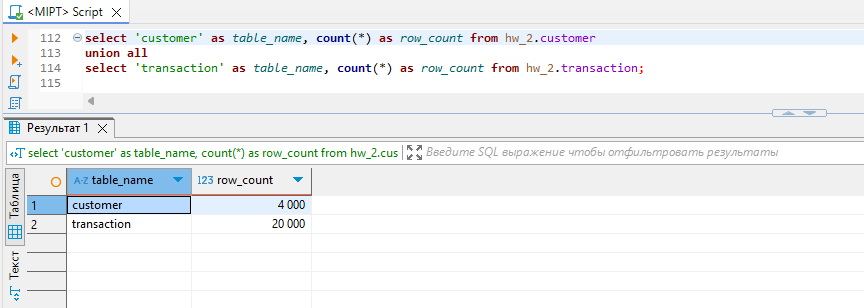

## 2. Выполнить следующие запросы ##

### 2.1. Вывести все уникальные бренды, у которых стандартная стоимость выше 1500 долларов ###
#### Скрипт ####
<code>
select distinct t.brand
from hw_2.transaction t
where t.standard_cost > 1500
order by t.brand;
</code>

#### Результат выполнения ####
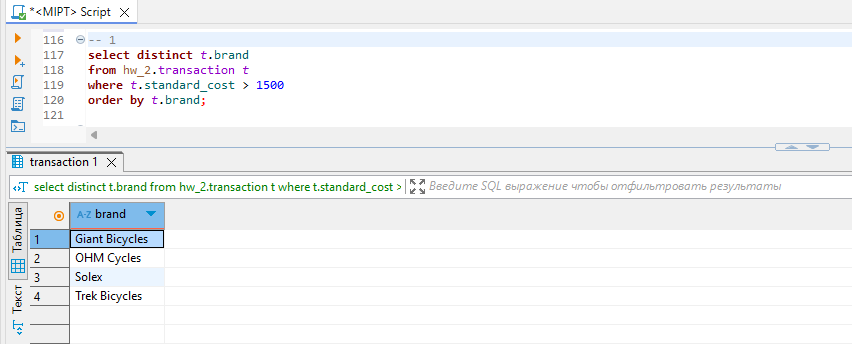

### 2.2 Вывести все подтвержденные транзакции за период '2017-04-01' по '2017-04-09' включительно ###
#### Скрипт ####
<code>
select *
from hw_2.transaction t
where lower(t.order_status) = 'approved'
  and to_date(t.transaction_date, 'DD.MM.YYYY') between '2017-04-01' and '2017-04-09'
order by t.transaction_id;
</code>

#### Результат выполнения ####
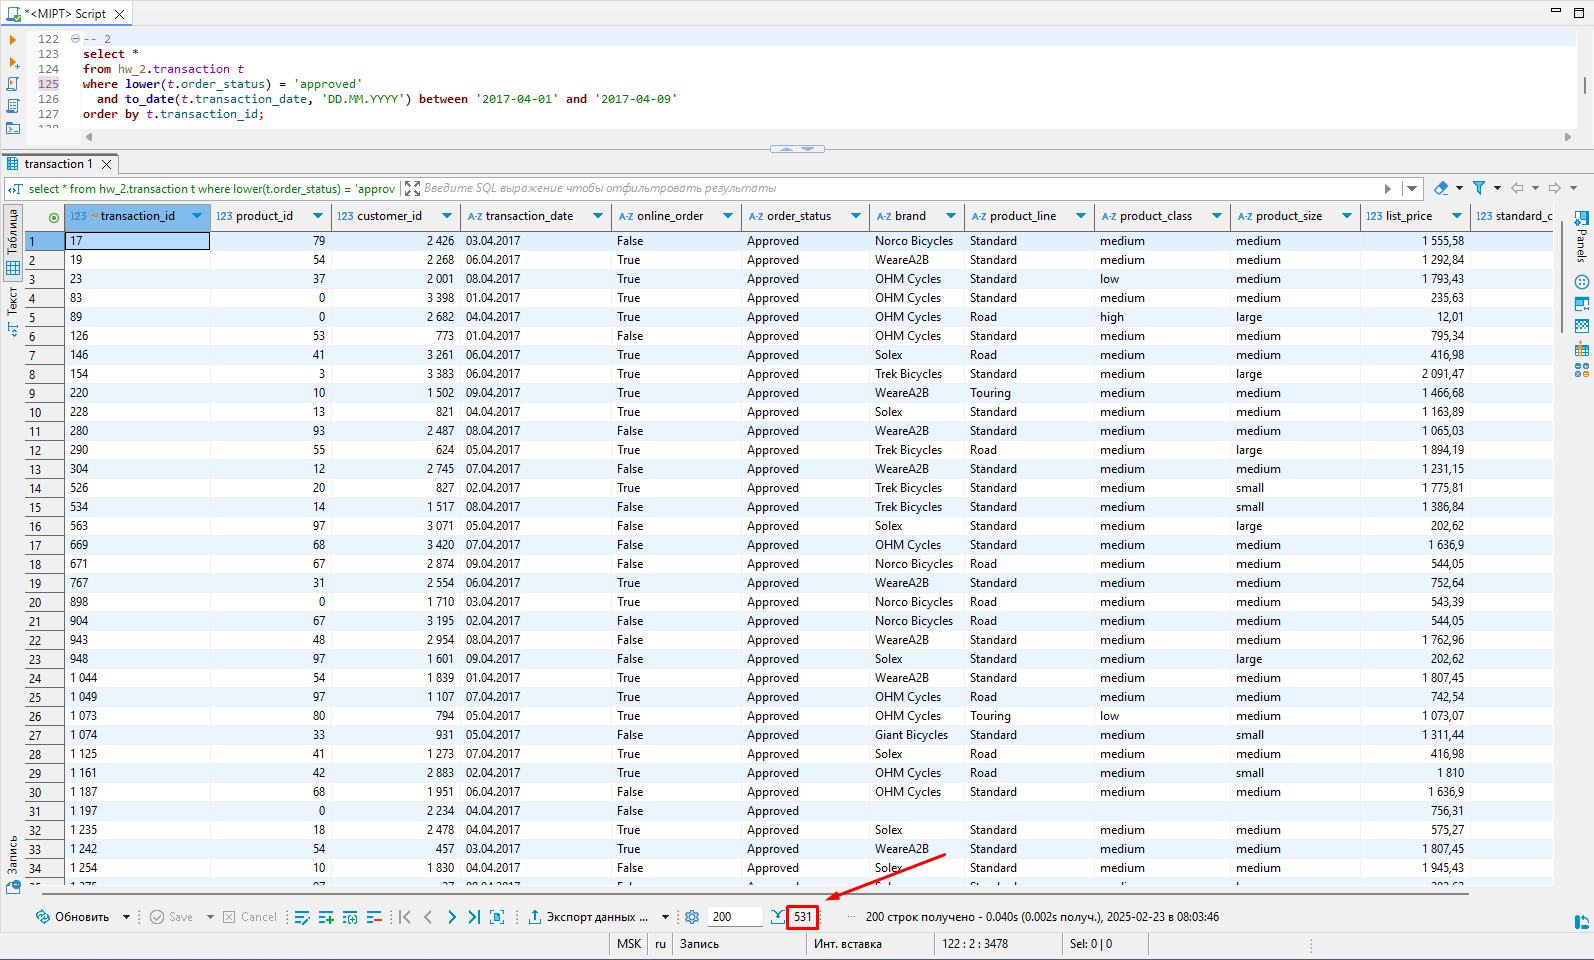

### 2.3. Вывести все профессии у клиентов из сферы IT или Financial Services, которые начинаются с фразы 'Senior' ###
#### Скрипт ####
<code>
select distinct c.job_title
from hw_2.customer c
where lower(c.job_industry_category) in('it', 'financial services')
  and lower(c.job_title) like 'senior%'
order by c.job_title;
</code>

#### Результат выполнения ####
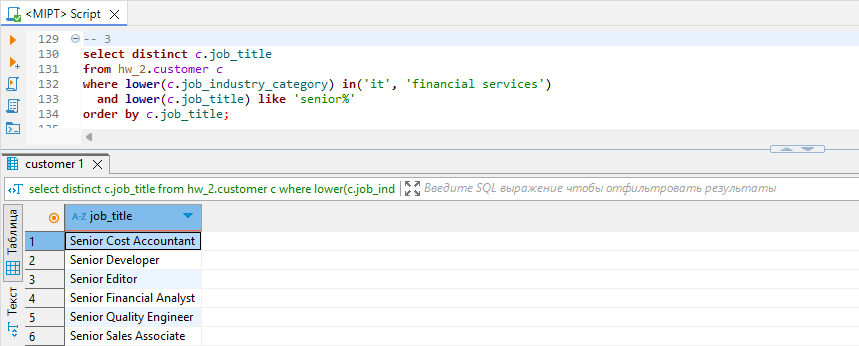

### 2.4.Вывести все бренды, которые закупают клиенты, работающие в сфере Financial Services ###
#### Скрипт ####
<code>
select distinct t.brand
from hw_2.transaction t
join hw_2.customer c on c.customer_id = t.customer_id
  and lower(c.job_industry_category) = 'financial services'
where t.brand is not null
  and t.brand != ''
order by t.brand;
</code>

##### Или через подзапрос #####

<code>
select distinct t.brand
from hw_2.transaction t
where t.customer_id in(
  select c.customer_id
  from hw_2.customer c
  where lower(c.job_industry_category) = 'financial services'
)
  and t.brand is not null
  and t.brand != ''
order by t.brand;
</code>

#### Результат выполнения ####
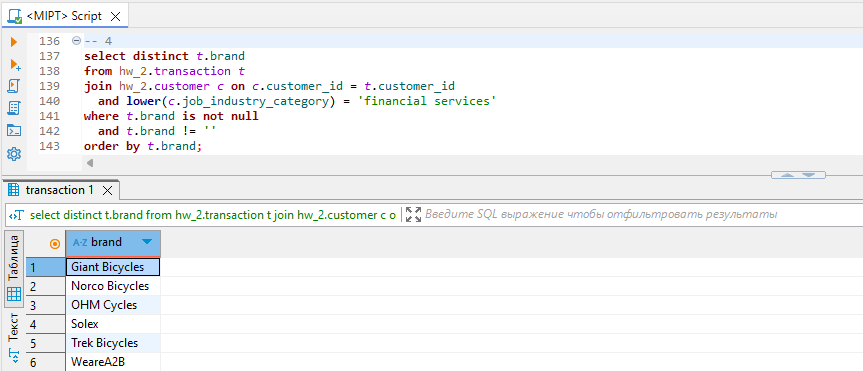

### 2.5. Вывести 10 клиентов, которые оформили онлайн-заказ продукции из брендов 'Giant Bicycles', 'Norco Bicycles', 'Trek Bicycles' ###
#### Скрипт ####
<code>
select distinct c.*
from hw_2.customer c
join hw_2.transaction t on t.customer_id = c.customer_id
where lower(t.brand) in ('giant bicycles', 'norco bicycles', 'trek bicycles')
  and lower(t.online_order) = 'true'
order by c.customer_id
limit 10;
</code>

#### Результат выполнения ####
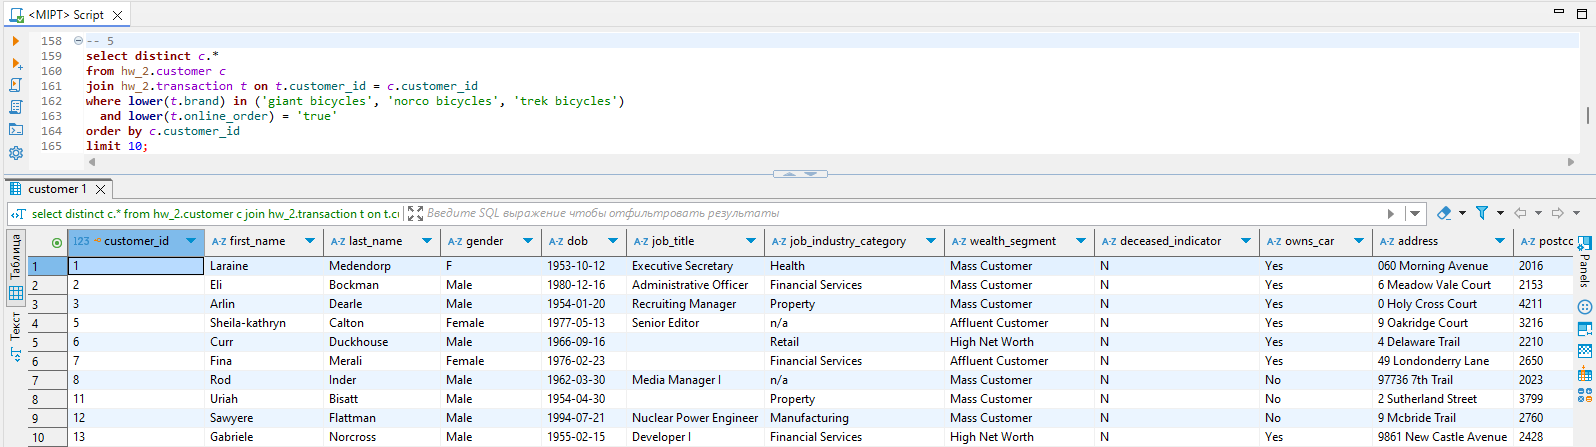

### 2.6. Вывести всех клиентов, у которых нет транзакций ###
#### Скрипт ####
<code>
select distinct c.*
from hw_2.customer c
left join hw_2.transaction t on t.customer_id = c.customer_id
where t.customer_id is null
order by c.customer_id;
</code>

#### Результат выполнения ####
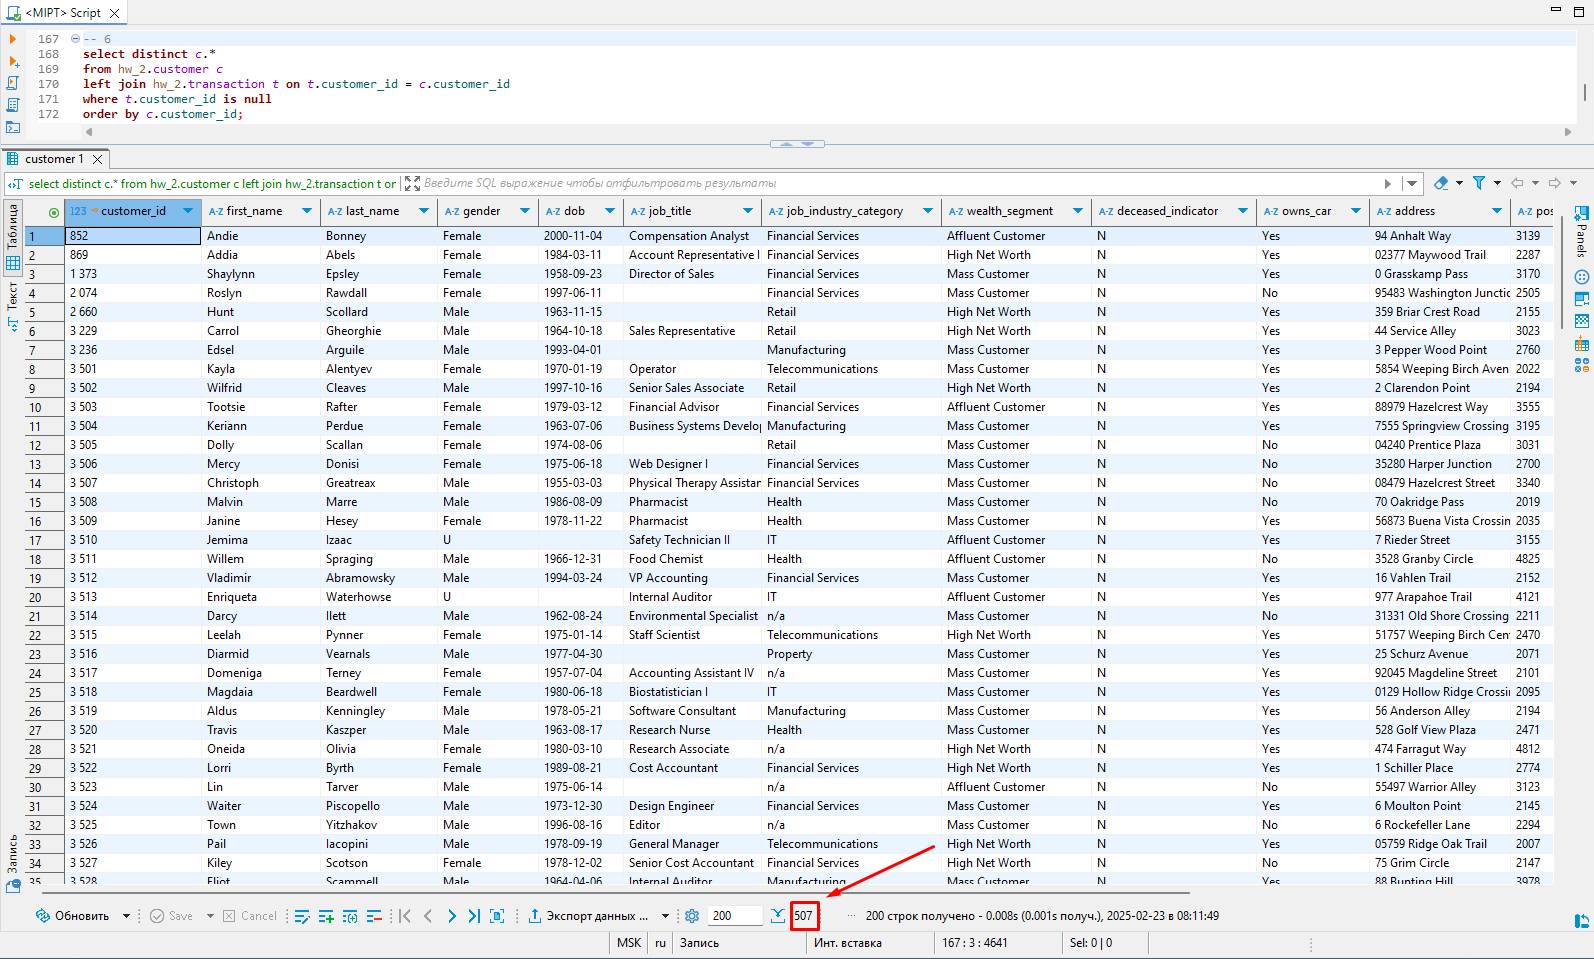

### 2.7. Вывести всех клиентов из IT, у которых транзакции с максимальной стандартной стоимостью ###
#### Скрипт ####
<code>
with max_standard_cost as (
  select max(t.standard_cost) as max_cost
  from hw_2.transaction t
)
select distinct c.*
from hw_2.customer c
join hw_2.transaction t on t.customer_id = c.customer_id
join max_standard_cost m on m.max_cost = t.standard_cost
where lower(c.job_industry_category) = 'it'
order by c.customer_id;
</code>

#### Результат выполнения ####
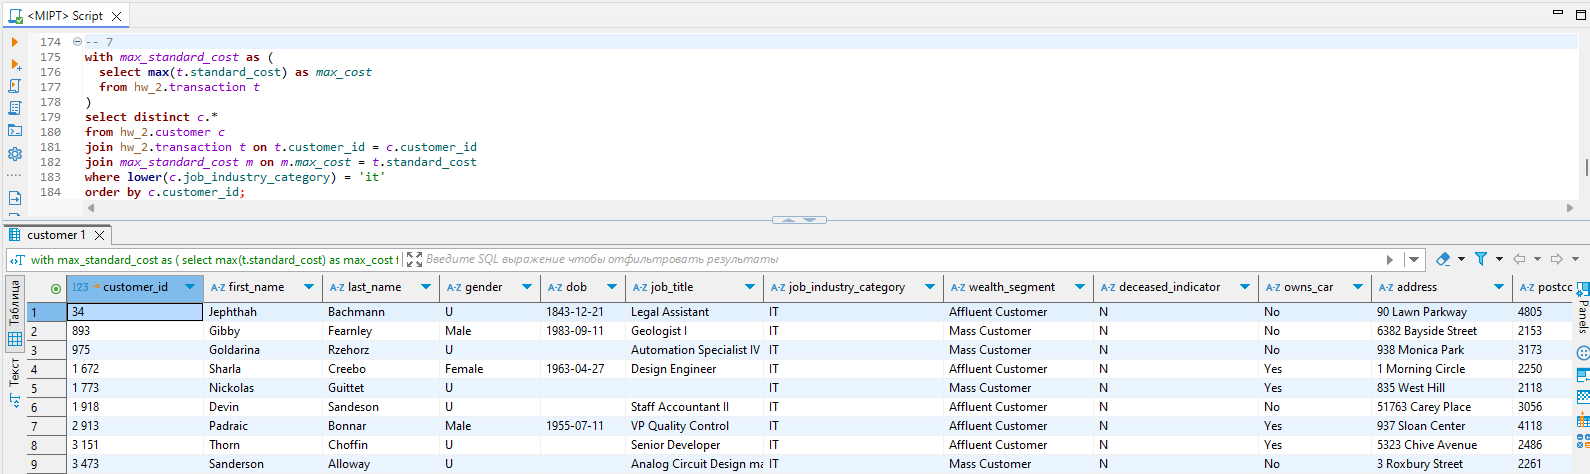

### 2.8. Вывести всех клиентов из сферы IT и Health, у которых есть подтвержденные транзакции за период '2017-07-07' по '2017-07-17' ###
#### Скрипт ####
<code>
select distinct c.*
from hw_2.customer c
join hw_2.transaction t on t.customer_id = c.customer_id
  and lower(t.order_status) = 'approved'
  and to_date(t.transaction_date, 'DD.MM.YYYY') between '2017-07-07' and '2017-07-17'
where lower(c.job_industry_category) in('it', 'health')
order by c.customer_id;
</code>

#### Результат выполнения ####
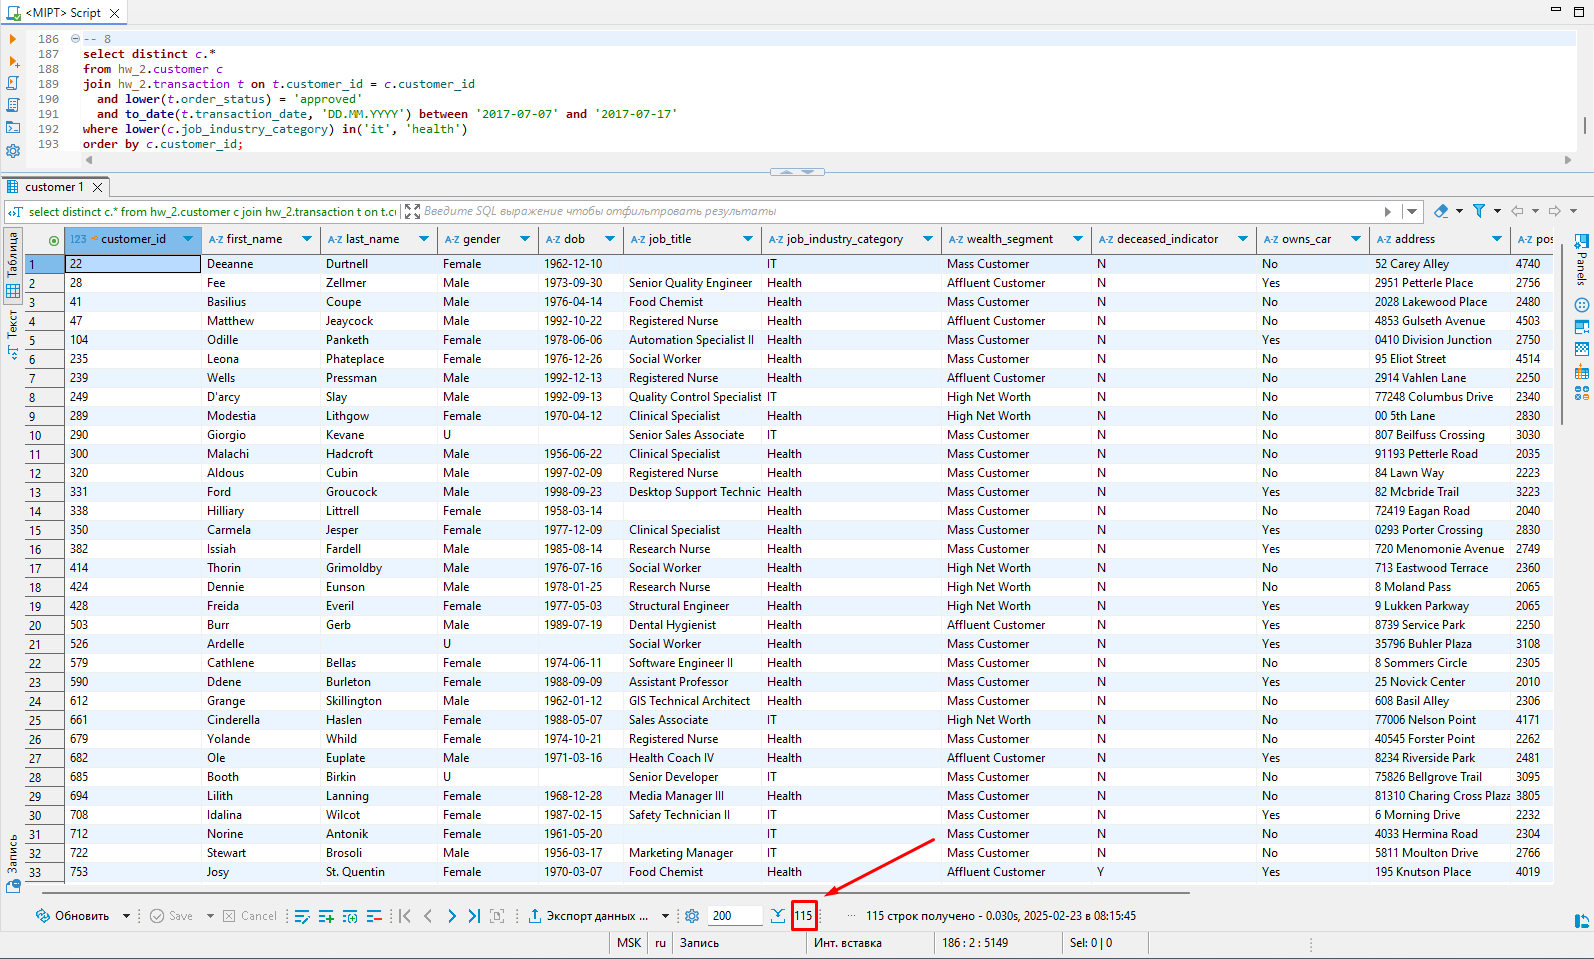